# **Blinkit Data Analysis**

**Data Overview** :
1. Item Fat Content - Describes the volume of Goods
2. Item Identifier - Product code of items
3. Item Type - Types of goods
4. Outlet establishment year - Year of starting particular outlet
5. Outlet Identifier - Code ID of Outlets
6. Outlet Location - Tier wise city
7. Outlet Type - What is the known role of outlet
8. Outlet Size - Small/Mid/Large
9. Item Visibility - Percentage of Items
10. Item Weights - Overall Kgs
11. Sales - Items selling price
12. Ratings - Customer Satisfaction



**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [2]:
df = pd.read_excel('BlinkIT Grocery Data.xlsx')
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


**Data Insights**

In [3]:
df.info()
df.describe()

missing_values = df.isnull().sum()
print(missing_values)
duplicate_values = df.duplicated().sum()
print(duplicate_values)
unique_values = df.nunique()
print(unique_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
Item Fat Content                0
Item Identi

**Data Cleaning**

In [4]:
# replacing the item fat content with proper values

df['Item Fat Content'] = df['Item Fat Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
df['Item Fat Content'].head(10)


,Item Fat Content
0,Regular
1,Low Fat
2,Regular
3,Regular
4,Low Fat
5,Low Fat
6,Low Fat
7,Low Fat
8,Low Fat
9,Low Fat


In [5]:
# fill missing values in item weight

df['Item Weight'].fillna(df['Item Weight'].median(), inplace=True)
df['Item Weight'].head(10)

<ipython-input-5-e0bf7755b7c5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item Weight'].fillna(df['Item Weight'].median(), inplace=True)


,Item Weight
0,15.10
1,11.80
2,13.85
3,12.15
4,19.60
5,8.89
6,11.80
7,19.70
8,20.75
9,12.60


KPIS Requirement
1. Total Sales
2. Average Sales
3. Number of items
4. Average Ratings

In [6]:
Total_Sales = df['Sales'].sum()
print("Total Sales of BlinkIT :: " , Total_Sales)

Average_Sales = df['Sales'].mean()
print("Avearge Sales of BlinkIT ::", Average_Sales)

Total_items_sold = df['Sales'].count()
print("Total number of items that Sold :: ",  Total_items_sold)

Average_Ratings = df['Rating'].mean()
print("Average Ratings of BlinkIT :: ", Average_Ratings)

Total Sales of BlinkIT ::  1201681.4928
Avearge Sales of BlinkIT :: 140.99278338613163
Total number of items that Sold ::  8523
Average Ratings of BlinkIT ::  3.965857092573038


**Exploratory Data Analysis**

  Item Fat Content        Sales
0          Low Fat  776319.6884
1          Regular  425361.8044
  Item Fat Content      Sales
0          Low Fat  140.71410
1          Regular  141.50426


<ipython-input-7-4ee4a4947dc6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Total_Sales_by_fat_content.sort_values('Sales', ascending=False), x ='Item Fat Content', y='Sales', palette='viridis')
<ipython-input-7-4ee4a4947dc6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Avearge_Sales_by_fat_content.sort_values('Sales', ascending=False), x ='Item Fat Content', y='Sales', palette='viridis')


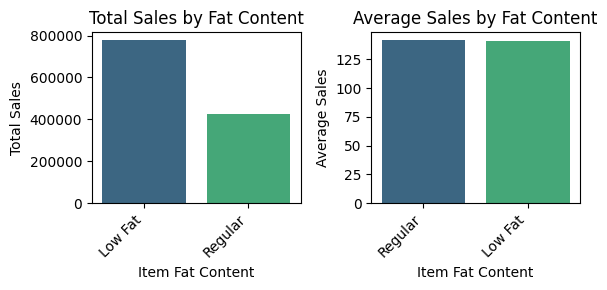

In [7]:
# Total Sales by fat content

Total_Sales_by_fat_content = df.groupby('Item Fat Content')['Sales'].sum().reset_index()
print(Total_Sales_by_fat_content)

Avearge_Sales_by_fat_content = df.groupby('Item Fat Content')['Sales'].mean().reset_index()
print(Avearge_Sales_by_fat_content)

plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
sns.barplot(data=Total_Sales_by_fat_content.sort_values('Sales', ascending=False), x ='Item Fat Content', y='Sales', palette='viridis')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, ha =  'right')
plt.title('Total Sales by Fat Content')

plt.subplot(1, 2, 2)
sns.barplot(data=Avearge_Sales_by_fat_content.sort_values('Sales', ascending=False), x ='Item Fat Content', y='Sales', palette='viridis')
plt.xlabel('Item Fat Content')
plt.ylabel('Average Sales')
plt.xticks(rotation = 45, ha =  'right')
plt.title('Average Sales by Fat Content')


plt.tight_layout()
plt.show()

                Item Type        Sales
0            Baking Goods   81894.7364
1                  Breads   35379.1198
2               Breakfast   15596.6966
3                  Canned   90706.7290
4                   Dairy  101276.4616
5            Frozen Foods  118558.8814
6   Fruits and Vegetables  178124.0810
7             Hard Drinks   29334.6806
8      Health and Hygiene   68025.8388
9               Household  135976.5254
10                   Meat   59449.8638
11                 Others   22451.8916
12                Seafood    9077.8700
13            Snack Foods  175433.9224
14            Soft Drinks   58514.1670
15          Starchy Foods   21880.0274
                Item Type       Sales
0            Baking Goods  126.380766
1                  Breads  140.952669
2               Breakfast  141.788151
3                  Canned  139.763835
4                   Dairy  148.499211
5            Frozen Foods  138.503366
6   Fruits and Vegetables  144.581235
7             Hard Drinks  137.07

<ipython-input-18-3e465f215aae>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=Total_Sales_by_item_type.sort_values('Sales', ascending=False), x ='Item Type', y='Sales', palette='viridis')
<ipython-input-18-3e465f215aae>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=Average_Sales_by_item_type.sort_values('Sales', ascending=False), x ='Item Type', y='Sales', palette='viridis')
<ipython-input-18-3e465f215aae>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=Sold_items_by_item_type.sort_values('Sales', a

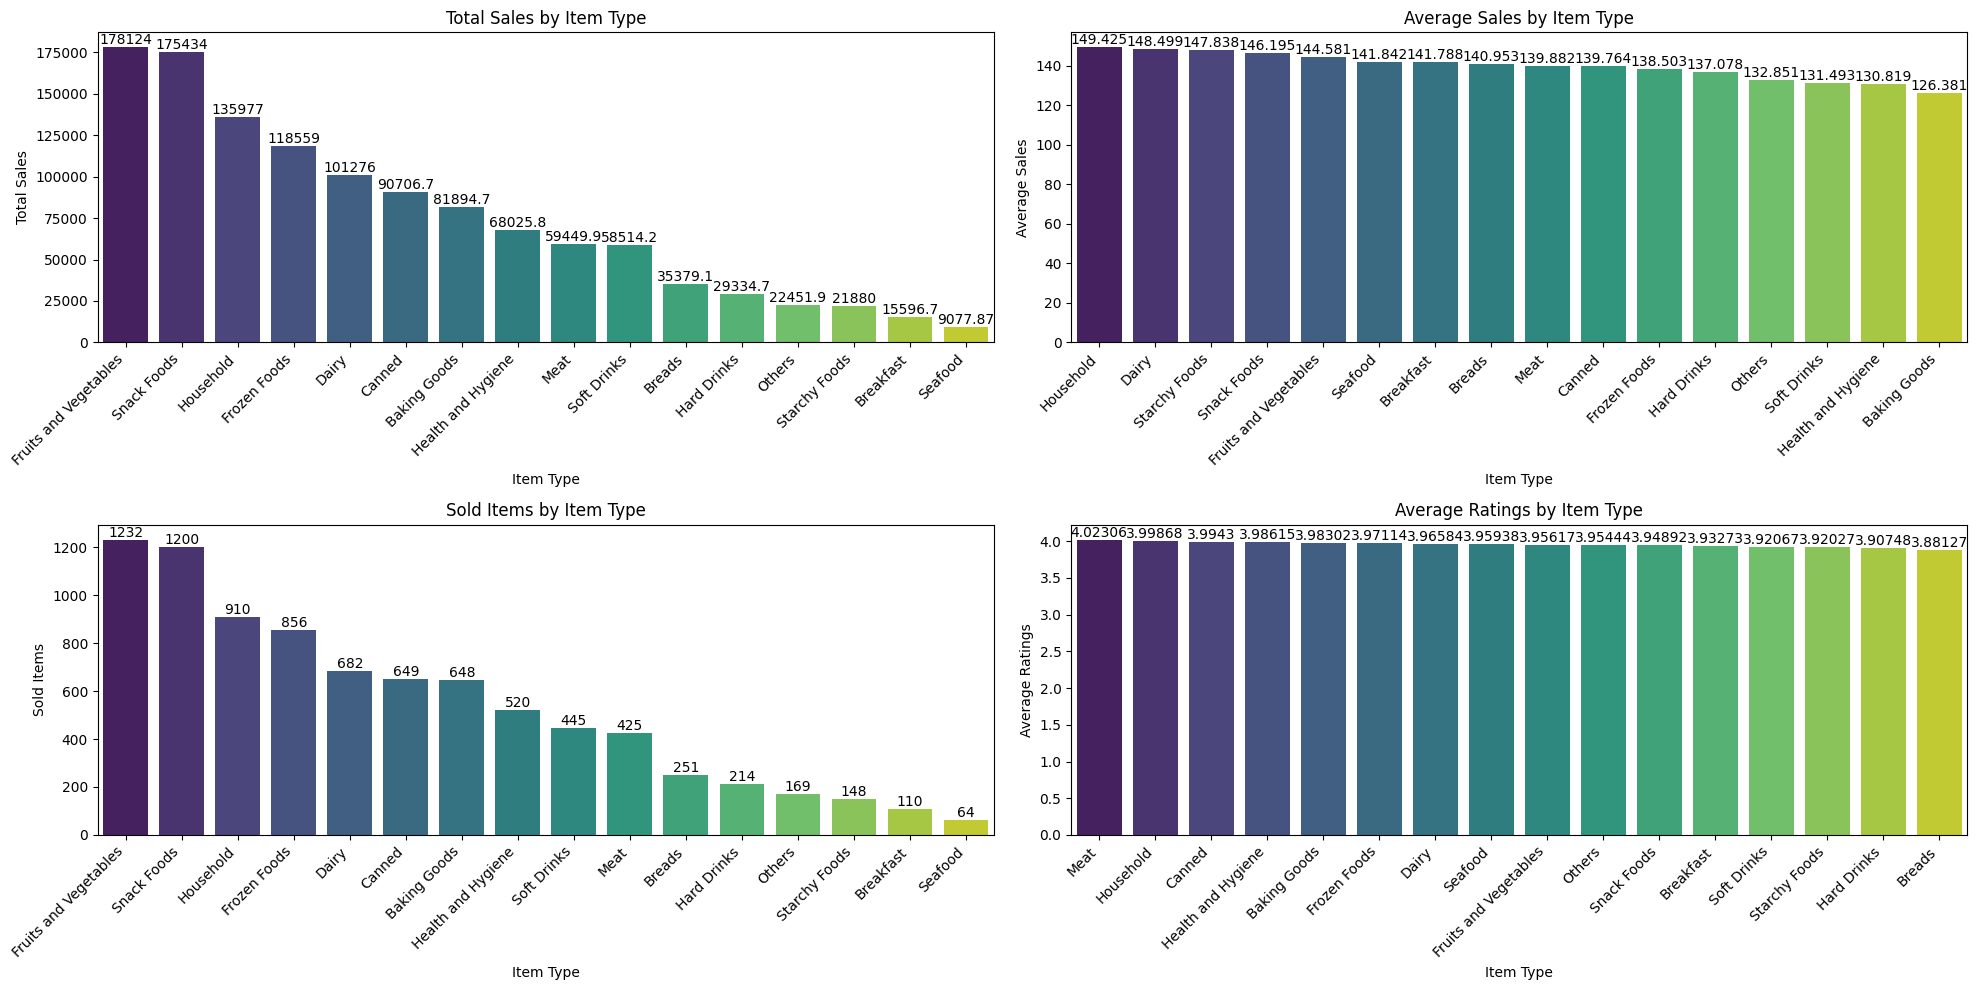

In [18]:
# Total sales by item type

Total_Sales_by_item_type = df.groupby('Item Type')['Sales'].sum().reset_index()
print(Total_Sales_by_item_type)

Average_Sales_by_item_type = df.groupby('Item Type')['Sales'].mean().reset_index()
print(Average_Sales_by_item_type)

Sold_items_by_item_type = df.groupby('Item Type')['Sales'].count().reset_index()
print(Sold_items_by_item_type)

Avearge_ratings_by_item_type  =  df.groupby('Item Type')['Rating'].mean().reset_index()
print(Avearge_ratings_by_item_type)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
bar = sns.barplot(data=Total_Sales_by_item_type.sort_values('Sales', ascending=False), x ='Item Type', y='Sales', palette='viridis')
for container in bar.containers:
    bar.bar_label(container)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, ha =  'right')
plt.title('Total Sales by Item Type')

plt.subplot(2,2,2)
bar = sns.barplot(data=Average_Sales_by_item_type.sort_values('Sales', ascending=False), x ='Item Type', y='Sales', palette='viridis')
for container in bar.containers:
    bar.bar_label(container)
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.xticks(rotation = 45, ha =  'right')
plt.title('Average Sales by Item Type')

plt.subplot(2,2,3)
bar = sns.barplot(data=Sold_items_by_item_type.sort_values('Sales', ascending=False), x ='Item Type', y='Sales', palette='viridis')
for container in bar.containers:
    bar.bar_label(container)
plt.xlabel('Item Type')
plt.ylabel('Sold Items')
plt.xticks(rotation = 45, ha =  'right')
plt.title('Sold Items by Item Type')

plt.subplot(2,2,4)
bar = sns.barplot(data=Avearge_ratings_by_item_type.sort_values('Rating', ascending=False), x ='Item Type', y='Rating', palette='viridis')
for container in bar.containers:
    bar.bar_label(container)
plt.xlabel('Item Type')
plt.ylabel('Average Ratings')
plt.xticks(rotation = 45, ha =  'right')
plt.title('Average Ratings by Item Type')

plt.tight_layout()
plt.show()

         Outlet Type Item Fat Content        Sales
0      Grocery Store          Low Fat   99814.3670
1      Grocery Store          Regular   52124.7820
2  Supermarket Type1          Low Fat  507886.3014
3  Supermarket Type1          Regular  279663.5914
4  Supermarket Type2          Low Fat   84844.6090
5  Supermarket Type2          Regular   46633.1674
6  Supermarket Type3          Low Fat   83774.4110
7  Supermarket Type3          Regular   46940.2636


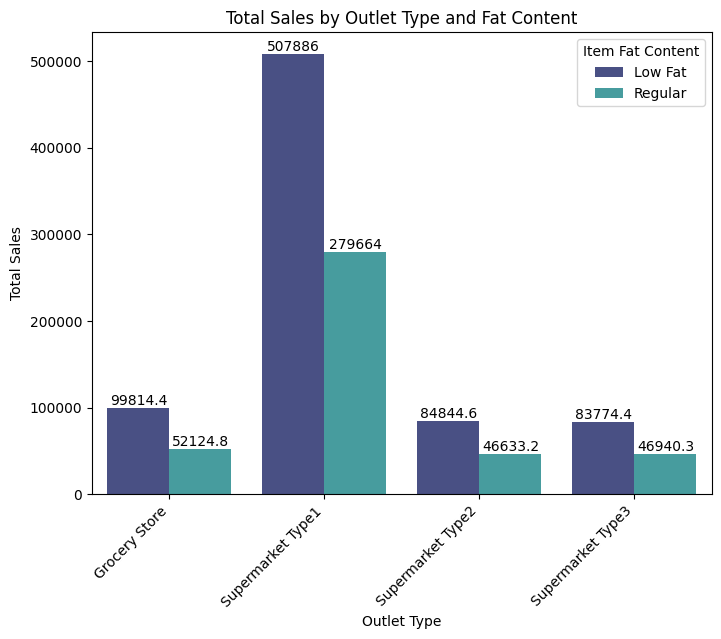

Item Fat Content       Low Fat      Regular
Outlet Type                                
Grocery Store       99814.3670   52124.7820
Supermarket Type1  507886.3014  279663.5914
Supermarket Type2   84844.6090   46633.1674
Supermarket Type3   83774.4110   46940.2636


In [16]:
# Total Sales accross different Outlet segement by fat content

Total_sales_by_Outlet_fat_content = df.groupby(['Outlet Type', 'Item Fat Content'])['Sales'].sum().reset_index()
print(Total_sales_by_Outlet_fat_content)

plt.figure(figsize=(8,6))
ax = sns.barplot(data= Total_sales_by_Outlet_fat_content, x ='Outlet Type', y='Sales', hue='Item Fat Content', palette='mako')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, ha =  'right')
plt.title('Total Sales by Outlet Type and Fat Content')
plt.show()

pivot = Total_sales_by_Outlet_fat_content.pivot(index='Outlet Type', columns='Item Fat Content', values='Sales')
print(pivot)

  Outlet Location Type        Sales
0               Tier 1  336397.8120
1               Tier 2  393150.6476
2               Tier 3  472133.0332


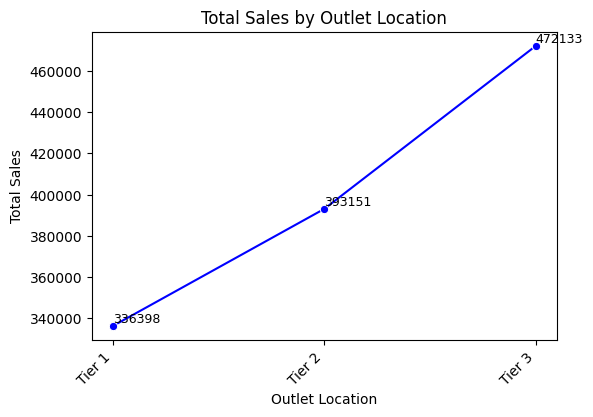

In [10]:
# Total sales by outlet location

Total_sales_by_outlet_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
print(Total_sales_by_outlet_location)

plt.figure(figsize=(6,4))
lineplot = sns.lineplot(data = Total_sales_by_outlet_location, x ='Outlet Location Type', y ='Sales', marker='o', color='blue')
for line in lineplot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        lineplot.text(x, y, f'{y:.0f}', ha='left', va='bottom', fontsize=9)
plt.xlabel('Outlet Location')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, ha =  'right')
plt.title('Total Sales by Outlet Location')
plt.show()

  Outlet Size        Sales
0        High  248991.5860
1      Medium  507895.7364
2       Small  444794.1704


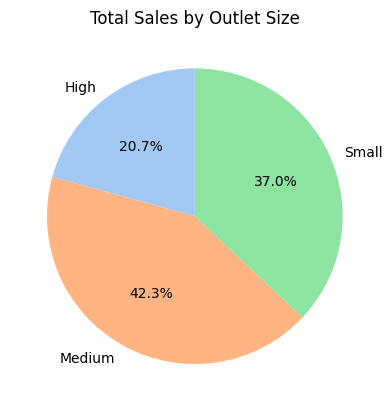

 The Correlation between Sales and Outlet Size is ::                          Sales  Outlet Size Encoded
Sales                1.000000            -0.014596
Outlet Size Encoded -0.014596             1.000000


In [15]:
# Total Sales by size
Total_sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum().reset_index()
print(Total_sales_by_outlet_size)

plt.pie(Total_sales_by_outlet_size['Sales'], labels=Total_sales_by_outlet_size['Outlet Size'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Total Sales by Outlet Size')
plt.show()

# analyze corr between Sales and size
size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
df['Outlet Size Encoded'] = df['Outlet Size'].map(size_mapping)

corr_coulumn = df[['Sales', 'Outlet Size Encoded']]
correlation = corr_coulumn.corr()
print(" The Correlation between Sales and Outlet Size is :: ", correlation)